### Open Questions:
1. What are we trying to solve? Make predictions in local communities.
2. What data set are you using (preferrably raw data)? Source? Compares?
3. What is being tracked?
4. Data for contact testing?

In [1]:
# Step 1: research how the data was collected, discuss the dataset
# Step 2: import and visualize
# Step 3: Clean
# Step 4: Visualize
# Step 5: Apply Data Science methodolgies

# Resources:
# Pulling Data from the internet: https://towardsdatascience.com/how-to-pull-data-from-an-api-using-python-requests-edcc8d6441b1
# https://docs.microsoft.com/en-us/azure/active-directory/develop/reply-url

# Step 0 - Method 1: Getting the data from source (web) to local drive via Azure API

In [69]:
# First step is to download an API interface app (Postman: https://www.postman.com/downloads/)
# Second Step is to review Microsoft Graph API documentation: https://docs.microsoft.com/en-us/graph/overview?view=graph-rest-1.0
# Third Step is to register App: https://docs.microsoft.com/en-us/graph/auth-register-app-v2?source=docs
# Add permissions: Files.ReadWrite.Selected

In [70]:
# def get_access_code():
#     client_id = '2f2ed715-e971-4a01-9f44-2b074d260b4e'
#     redirect_uri = 'https://api.covidtracking.com/v1/us/daily.csv'
#     scope = 'files.readwrite.all offline_access mail.readwrite'
#     url = """https://login.microsoftonline.com/common/oauth2/v2.0/authorize?client_id={}&scope={}
#       &response_type=code&redirect_uri={}""".format(client_id, scope, redirect_uri)
#     return url
    
# print(get_access_code())

In [4]:
# pip install --upgrade requests

In [5]:
# # https://api.covidtracking.com/v1/us/daily.csv?error=invalid_request&error_description=The%20provided%20request%20must%20include%20a%20%27response_type%27%20input%20parameter.
# import requests
# url = "https://login.microsoftonline.com/common/oauth2/v2.0/token"
# payload = "client_id%0A=74dc4c57-e2f9-43f1-a2e9-6094e32d475c&redirect_uri=https://api.covidtracking.com/v1/us/daily.csv?error=invalid_request&error_description=The%20provided%20request%20must%20include%20a%20%27response_type%27%20input%20parameter.%2F&client_secret=L5C.RsoxobV5O6BZ9V9lH~NC-15T4.~0Ne&code={}&grant_type=authorization_code&undefined=".format(code)
# headers = {
#     'Content-Type': "application/x-www-form-urlencoded",
#     'cache-control': "no-cache"
#     }
# response = requests.request("POST", url, data=payload, headers=headers)
# print(response.text)

# Step 0 - Method 2: Getting the data from source (web) to local drive via Python HTTP Library

In [7]:
# pip install pandas

     |████████████████████████████████| 10.6 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install matplotlib

     |████████████████████████████████| 8.5 MB 1.5 MB/s eta 0:00:01     |█████████████▉                  | 3.7 MB 968 kB/s eta 0:00:05
     |████████████████████████████████| 2.2 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 6.3 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [111]:
import csv
import requests
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
import missingno as msno 

%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

In [60]:
# import data from local source. Data downloaded from: https://covidtracking.com/data/download
# saves data from source to local drive (or overwrite existing data)
url_USA = 'https://api.covidtracking.com/v1/us/daily.csv'
url_CA = 'https://api.covidtracking.com/v1/states/ca/daily.csv'
response_USA = requests.get(url_USA)
response_CA = requests.get(url_CA)
with open(os.path.join("/Users/lizgarcia/Desktop/ROADMAP/PYTHON/Covid-19-Anaylsis/Data", "covid-19-data-USA.csv"), 'wb') as f:
    f.write(response_USA.content)
    
with open(os.path.join("/Users/lizgarcia/Desktop/ROADMAP/PYTHON/Covid-19-Anaylsis/Data", "covid-19-data-CA.csv"), 'wb') as f:
    f.write(response_CA.content)

# Step 1: Importing the Data

In [81]:
# load the dataset
df_US = pd.read_csv(r'/Users/lizgarcia/Desktop/ROADMAP/PYTHON/Covid-19-Anaylsis/Data/covid-19-data-USA.csv')
df_CA = pd.read_csv(r'/Users/lizgarcia/Desktop/ROADMAP/PYTHON/Covid-19-Anaylsis/Data/covid-19-data-CA.csv')

# display the first 3 rows 
display(df_US.head(n=3))
print('Total rows x col.: ', df_US.shape)
display(df_CA.head(n=3))
print('Total rows x col.: ', df_CA.shape)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200821,56,5593318,64743463,4199.0,40951.0,357093.0,8349.0,16563.0,2286.0,...,2020-08-21T00:00:00Z,70340980,70336781,70336781,1123,1817,685099,46821,731920,cd07637ded4b265fc45cb2c204784d5cb8c70085
1,20200820,56,5546497,64058364,4170.0,41988.0,355276.0,8483.0,16487.0,2335.0,...,2020-08-20T00:00:00Z,69609031,69604861,69604861,1134,2010,621696,43740,665436,5e7ec5926f868e83e4fd901d5b6b7e3c0c9f161b
2,20200819,56,5502757,63436668,4374.0,43330.0,353266.0,8744.0,16377.0,2371.0,...,2020-08-19T00:00:00Z,68943799,68939425,68939425,1420,2032,630559,44933,675492,64c8b61e3c52baa7b1bcb0a6bbaa8dee87f3e71c


Total rows x col.:  (213, 25)


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200821,CA,650336,9679036,NaN,6039.0,NaN,1706.0,NaN,NaN,...,10329372,135,0,2cfb2a2be93fafb01559d32f3f621a0403db841e,0,0,0,0,0,NaN
1,20200820,CA,644751,9583215,NaN,6212.0,NaN,1707.0,NaN,NaN,...,10227966,163,0,6d74d9cdc8ce1265c3772543ff51d104c4da333c,0,0,0,0,0,NaN
2,20200819,CA,638831,9501852,NaN,6479.0,NaN,1761.0,NaN,NaN,...,10140683,181,0,cbc3e20131349d23d0fffe1218beee47064d0ef7,0,0,0,0,0,NaN


Total rows x col.:  (171, 53)


In [72]:
# columns and data types
df_US.dtypes

date                          int64
states                        int64
positive                      int64
negative                      int64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
recovered                   float64
dateChecked                  object
death                       float64
hospitalized                float64
lastModified                 object
total                         int64
totalTestResults              int64
posNeg                        int64
deathIncrease                 int64
hospitalizedIncrease          int64
negativeIncrease              int64
positiveIncrease              int64
totalTestResultsIncrease      int64
hash                         object
dtype: object

In [74]:
# columns and data types
df_CA.dtypes

date                             int64
state                           object
positive                         int64
negative                         int64
pending                        float64
hospitalizedCurrently          float64
hospitalizedCumulative         float64
inIcuCurrently                 float64
inIcuCumulative                float64
onVentilatorCurrently          float64
onVentilatorCumulative         float64
recovered                      float64
dataQualityGrade                object
lastUpdateEt                    object
dateModified                    object
checkTimeEt                     object
death                          float64
hospitalized                   float64
dateChecked                     object
totalTestsViral                  int64
positiveTestsViral             float64
negativeTestsViral             float64
positiveCasesViral             float64
deathConfirmed                 float64
deathProbable                  float64
totalTestEncountersViral 

# Step 2: Preprocessing the Data

## Step 2.1: Assess Missing Data

Sources of missing data could come from user forgetting to fill in a field, data was lost in transit, programming error, or user chose not to fill in the file.

In [ ]:
print df_US['']

In [88]:
# assessing how much data is missing in each column for 
# the nation and state data

pd.options.display.max_rows = None
print('US:')
df_US.shape[0] - df_US.count()

US:


date                         0
states                       0
positive                     0
negative                     0
pending                     42
hospitalizedCurrently       55
hospitalizedCumulative      42
inIcuCurrently              64
inIcuCumulative             63
onVentilatorCurrently       63
onVentilatorCumulative      70
recovered                   63
dateChecked                  0
death                       19
hospitalized                42
lastModified                 0
total                        0
totalTestResults             0
posNeg                       0
deathIncrease                0
hospitalizedIncrease         0
negativeIncrease             0
positiveIncrease             0
totalTestResultsIncrease     0
hash                         0
dtype: int64

In [89]:
print('CA: ')
df_CA.shape[0] - df_CA.count()

CA: 


date                             0
state                            0
positive                         0
negative                         0
pending                        143
hospitalizedCurrently           23
hospitalizedCumulative         171
inIcuCurrently                  23
inIcuCumulative                171
onVentilatorCurrently          171
onVentilatorCumulative         171
recovered                      171
dataQualityGrade                19
lastUpdateEt                     8
dateModified                     8
checkTimeEt                      8
death                            8
hospitalized                   171
dateChecked                      8
totalTestsViral                  0
positiveTestsViral             171
negativeTestsViral             171
positiveCasesViral              56
deathConfirmed                 171
deathProbable                  171
totalTestEncountersViral       171
totalTestsPeopleViral          171
totalTestsAntibody             171
positiveTestsAntibod

Nation


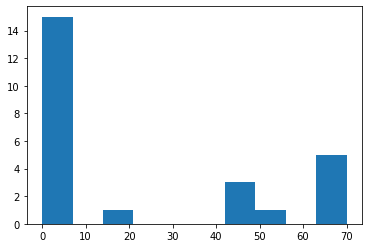

In [105]:
# Patterns of missing data:
print('Nation')
na_count_US=pd.DataFrame(df_US.shape[0] - df_US.count())
na_count_US.columns=['na_count_US'];
plt.hist(na_count_US['na_count_US']);

California


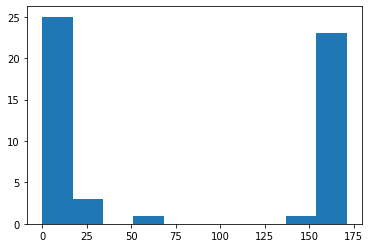

In [106]:
print('California')
na_count_CA=pd.DataFrame(df_CA.shape[0] - df_CA.count())
na_count_CA.columns=['na_count_CA'];
plt.hist(na_count_CA['na_count_CA']);

It appears for the nation-wide dataset, the outlier column is 

In [109]:
print(df_US.shape[0])

213


In [108]:
print(df_US.count())

date                        213
states                      213
positive                    213
negative                    213
pending                     171
hospitalizedCurrently       158
hospitalizedCumulative      171
inIcuCurrently              149
inIcuCumulative             150
onVentilatorCurrently       150
onVentilatorCumulative      143
recovered                   150
dateChecked                 213
death                       194
hospitalized                171
lastModified                213
total                       213
totalTestResults            213
posNeg                      213
deathIncrease               213
hospitalizedIncrease        213
negativeIncrease            213
positiveIncrease            213
totalTestResultsIncrease    213
hash                        213
dtype: int64
